In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
country_features = pd.read_pickle("extracted_features_with_project_id.pkl")

In [4]:
country_features.columns

Index(['year', 'month', 'day', 'id', 'name', 'countries', 'Total Amount',
       'Project Name', 'wb_project_id'],
      dtype='object')

In [5]:
country_features.countries.apply(len).value_counts()

2     2345
3      476
1      234
4       86
6       17
5       14
0        6
7        6
8        5
10       3
12       2
11       1
Name: countries, dtype: int64

In [6]:
country_counts = dict()
for country_list in country_features.countries:
    for country in country_list:
        if country in country_counts:
            country_counts[country] += 1
        else:
            country_counts[country] = 1

In [27]:
names_values = list(country_counts.items())
names_values.remove(names_values[1])
names_values.sort(key=lambda x: x[1],reverse=True)
country_names = [x[0] for x in names_values[:30]]
country_name_counts = [x[1] for x in names_values[:30]]

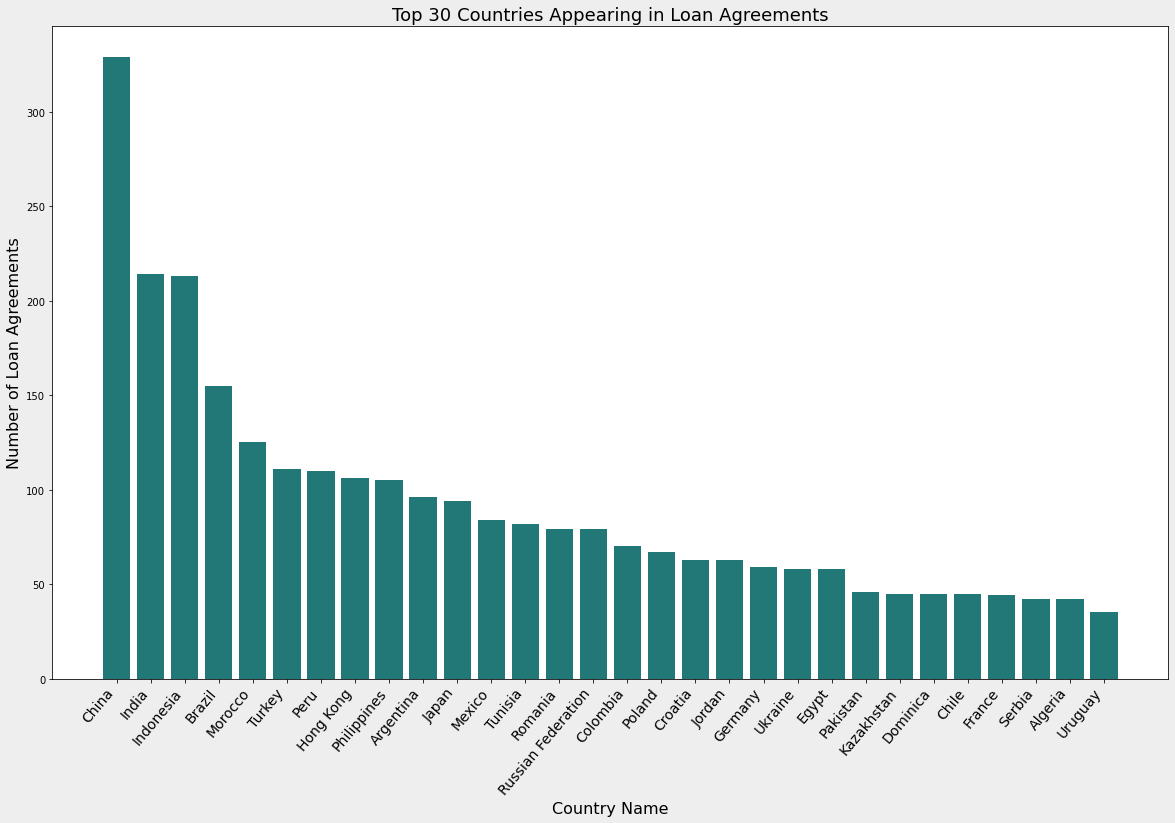

In [41]:
fig = plt.figure(figsize=(20,12),facecolor="#eeeeee")
ax = plt.bar(country_names,country_name_counts,color="#227777")
plt.xticks(rotation=50,fontsize=14,position=(1,0),horizontalalignment='right')
plt.xlabel("Country Name",fontsize=16)
plt.ylabel("Number of Loan Agreements",fontsize=16)
plt.title("Top " + str(len(country_names)) + " Countries Appearing in Loan Agreements",fontsize=18)
plt.show()

In [42]:
country_codes = pd.read_csv("id_date_country.csv")

In [48]:
country_code_counts = country_codes.country_name.value_counts()
country_codes_idx = country_code_counts.index[:30]
country_codes_val = country_code_counts.values[:30]

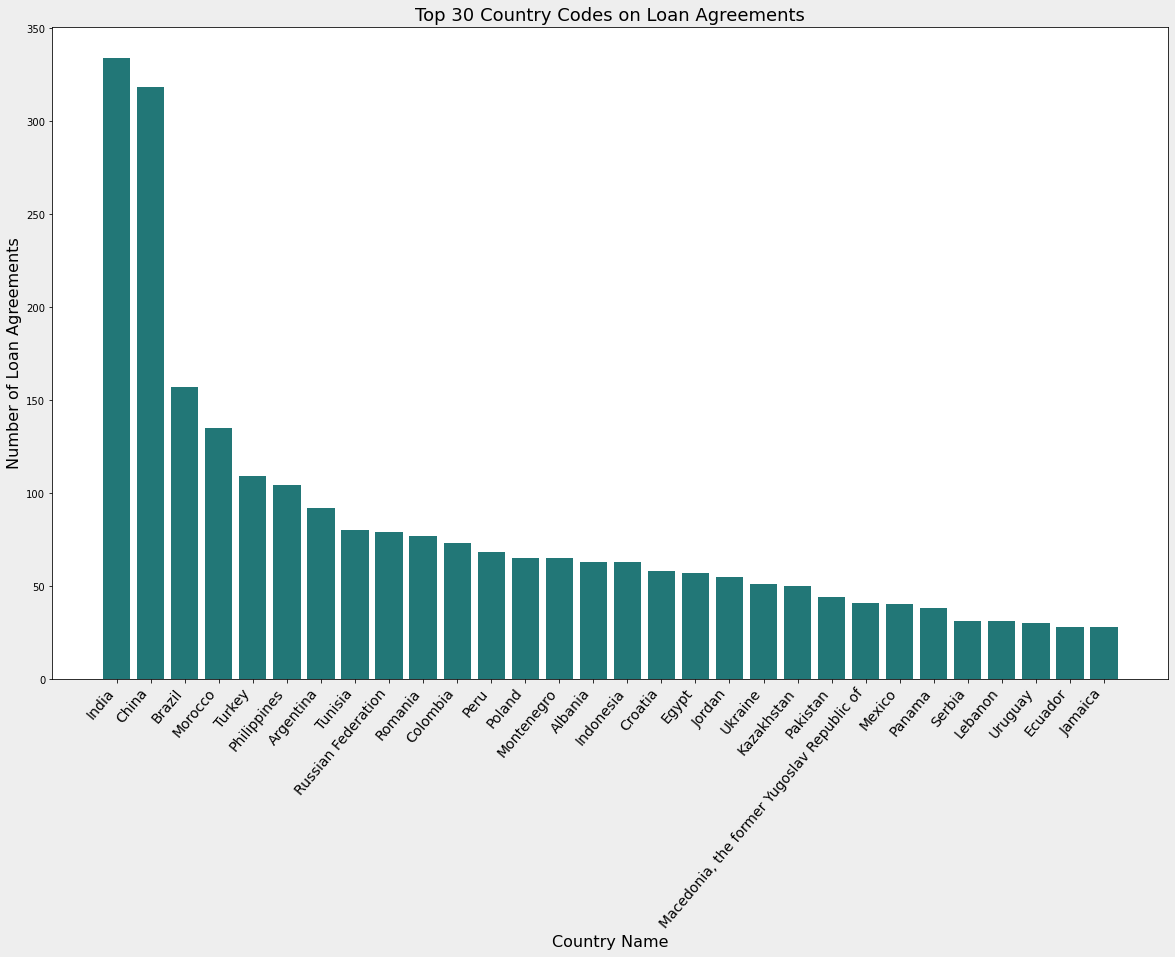

In [49]:
fig = plt.figure(figsize=(20,12),facecolor="#eeeeee")
ax = plt.bar(country_codes_idx,country_codes_val,color="#227777")
plt.xticks(rotation=50,fontsize=14,position=(1,0),horizontalalignment='right')
plt.xlabel("Country Name",fontsize=16)
plt.ylabel("Number of Loan Agreements",fontsize=16)
plt.title("Top " + str(len(country_codes_idx)) + " Country Codes on Loan Agreements",fontsize=18)
plt.show()

These histograms are kind of different. India has a lot more projects when measured by country code than by appearance of the name. But most of the top countries are the same.

In [50]:
sum(country_code_counts)

3104

In [51]:
sum(country_codes_val)

2464